In [1]:
import os
os.chdir('G:\\D\\Edureka\\Edureka - 24 June - Python\\Class 19 - 20\\')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [10]:
dataset = pd.read_csv('airline_passengers.csv')

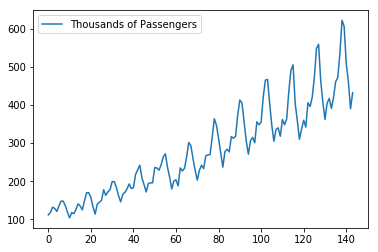

In [12]:
dataset.plot()

In [13]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [14]:
dataset

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [15]:
dataset.set_index('Month', inplace=True)

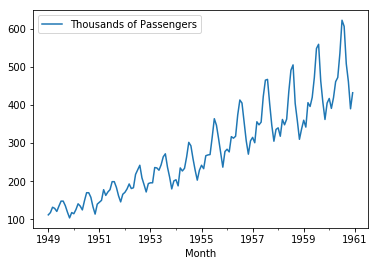

In [17]:
dataset.plot()

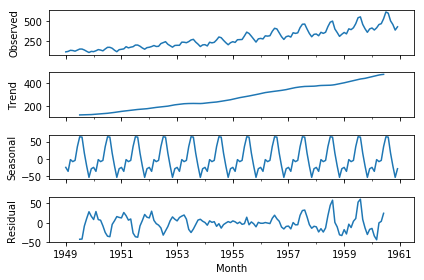

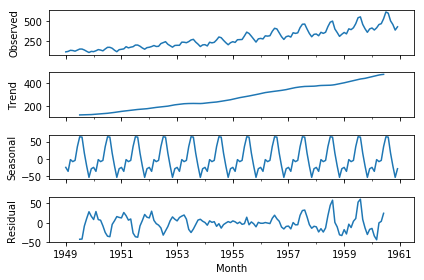

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(dataset['Thousands of Passengers'], freq=12)
decompostion.plot()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [22]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test')
    labels =['ADF Test Statistic', 'P-value', '#lags', 'No of Obs']
    for value, label in zip(result,labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('Strong evidence agaisnt null hypothesis and my time series is sationary')
    else:
        print('Weak evidence agaisnt null hypothesis and my time series is not stationary')
    

In [23]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistic:0.8153688792060433
P-value:0.9918802434376409
#lags:13
No of Obs:130
Weak evidence agaisnt null hypothesis and my time series is not stationary


In [24]:
dataset['Thousands of Passengers First Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1)

In [28]:
adf_check(dataset['Thousands of Passengers First Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistic:-2.829266824169995
P-value:0.05421329028382612
#lags:12
No of Obs:130
Weak evidence agaisnt null hypothesis and my time series is not stationary


In [29]:
dataset['Thousands of Passengers second Diff'] = dataset['Thousands of Passengers First Diff']-dataset['Thousands of Passengers First Diff'].shift(1)

In [30]:
dataset

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [31]:
adf_check(dataset['Thousands of Passengers second Diff'].dropna())
#d=2

Augmented Dickey Fuller Test
ADF Test Statistic:-16.3842315424685
P-value:2.7328918500142407e-29
#lags:11
No of Obs:130
Strong evidence agaisnt null hypothesis and my time series is sationary


In [32]:
dataset['Seasonal Difference'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(12)

In [34]:
adf_check(dataset['Seasonal Difference'].dropna())
#D=1

Augmented Dickey Fuller Test
ADF Test Statistic:-3.3830207264924814
P-value:0.011551493085514952
#lags:1
No of Obs:130
Strong evidence agaisnt null hypothesis and my time series is sationary


In [ ]:
#AR(p=2) 
#PACF (Partial Autocorrelation Function)
#Yt+1 = B1Yt + B2Yt-1 + e

In [ ]:
#MA(q=2)
#ACF Autocorrealation Function
# Yt+1 = a1e1 + a2et-1 +... Mu + e

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


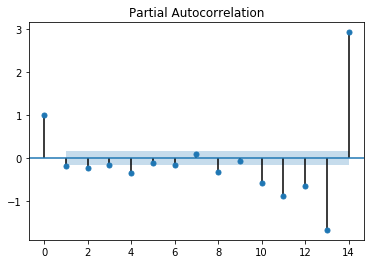

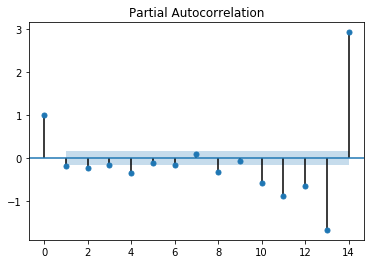

In [36]:
plot_pacf(dataset['Thousands of Passengers second Diff'].dropna(),lags=14)
#p=0

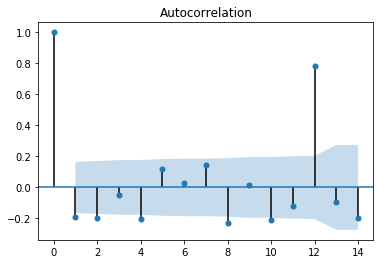

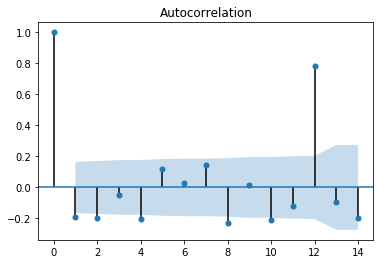

In [37]:
plot_acf(dataset['Thousands of Passengers second Diff'].dropna(), lags=14)
#q=0

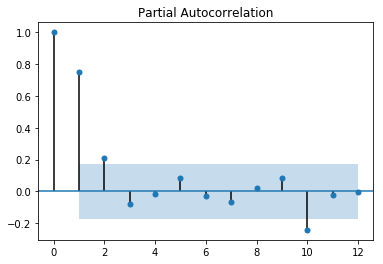

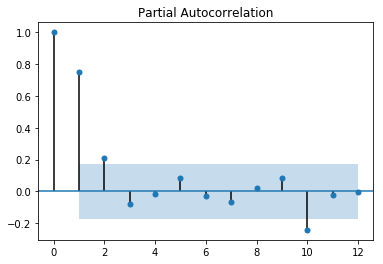

In [38]:
plot_pacf(dataset['Seasonal Difference'].dropna(), lags=12)
#P=1

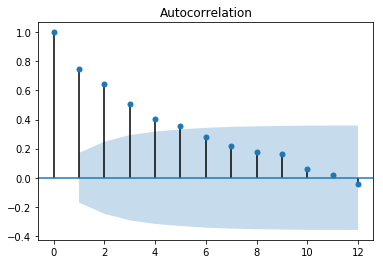

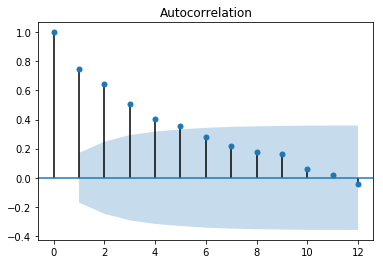

In [39]:
plot_acf(dataset['Seasonal Difference'].dropna(),lags=12)
#Q=2

In [ ]:
#d = 2 , D = 1, p = 0 , P = 1, q = 0, Q = 2

In [41]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [47]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order=(0,2,0), seasonal_order=(1,2, 1, 12))
results = model.fit()
print(results.summary())

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 2, 1, 12)   Log Likelihood                -536.009
Date:                            Sun, 22 Sep 2019   AIC                           1078.018
Time:                                    22:44:32   BIC                           1086.330
Sample:                                01-01-1949   HQIC                          1081.393
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1960      0.139     -1.413      0.158      -0.468       0.076
ma.S.L12      -0.9993     46.746   

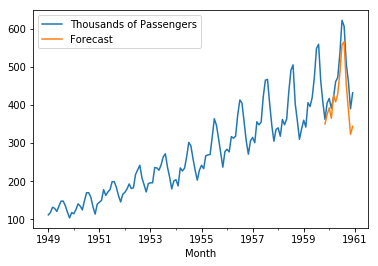

In [48]:
dataset['Forecast'] = results.predict(start = 130, end=144, dynamic=True)
dataset[['Thousands of Passengers', 'Forecast']].plot()

In [46]:
dataset

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN


In [49]:
from pandas.tseries.offsets import DateOffset
future_dates = [dataset.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [50]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00')]

In [51]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [52]:
future_dates_df

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [53]:
future_df = pd.concat([dataset,future_dates_df])

In [54]:
future_df

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN
1949-10-01,119,-17.0,-5.0,NaN,NaN


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


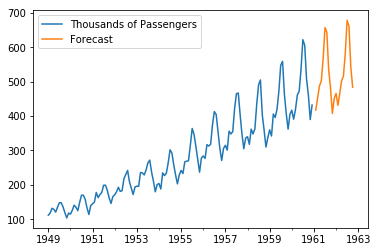

In [55]:
future_df['Forecast'] = results.predict(start=145, end=165, dynamic=True)
future_df[['Thousands of Passengers', 'Forecast']].plot()

In [56]:
future_df

,Thousands of Passengers,Thousands of Passengers First Diff,Thousands of Passengers second Diff,Seasonal Difference,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
1949-06-01,135,14.0,22.0,NaN,NaN
1949-07-01,148,13.0,-1.0,NaN,NaN
1949-08-01,148,0.0,-13.0,NaN,NaN
1949-09-01,136,-12.0,-12.0,NaN,NaN
1949-10-01,119,-17.0,-5.0,NaN,NaN


In [ ]:
Next Class 5PM to 8PM IST? 